In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
import pandas as pd
import numpy as np



df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/DataMining/lab07/Iris.xlsx");

df = df.dropna()
print(df.shape);
print(df)


# Display the numerical dataset
print(list(df.columns))
print(len(df.columns))

(150, 5)
     sepal_len  sepal_wid  petal_len  petal_wid  class
0          5.1        3.5        1.4        0.2      0
1          4.9        3.0        1.4        0.2      0
2          4.7        3.2        1.3        0.2      0
3          4.6        3.1        1.5        0.2      0
4          5.0        3.6        1.4        0.2      0
..         ...        ...        ...        ...    ...
145        6.7        3.0        5.2        2.3      2
146        6.3        2.5        5.0        1.9      2
147        6.5        3.0        5.2        2.0      2
148        6.2        3.4        5.4        2.3      2
149        5.9        3.0        5.1        1.8      2

[150 rows x 5 columns]
['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
5


In [76]:
!pip install --upgrade scikit-learn
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1

import sklearn
print(sklearn.__version__)

E: Package 'libfluidsynth1' has no installation candidate
1.4.2


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score,accuracy_score,auc
from sklearn.metrics import roc_curve, roc_auc_score
#, plot_roc_curve


data summary
        sepal_len   sepal_wid   petal_len   petal_wid       class
count  150.000000  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667    1.000000
std      0.828066    0.433594    1.764420    0.763161    0.819232
min      4.300000    2.000000    1.000000    0.100000    0.000000
25%      5.100000    2.800000    1.600000    0.300000    0.000000
50%      5.800000    3.000000    4.350000    1.300000    1.000000
75%      6.400000    3.300000    5.100000    1.800000    2.000000
max      7.900000    4.400000    6.900000    2.500000    2.000000
150 5

 correlation Matrix
           sepal_len  sepal_wid  petal_len  petal_wid     class
sepal_len   1.000000  -0.109369   0.871754   0.817954  0.782561
sepal_wid  -0.109369   1.000000  -0.420516  -0.356544 -0.419446
petal_len   0.871754  -0.420516   1.000000   0.962757  0.949043
petal_wid   0.817954  -0.356544   0.962757   1.000000  0.956464
class       0.782561  -0.419446   0.949043   0

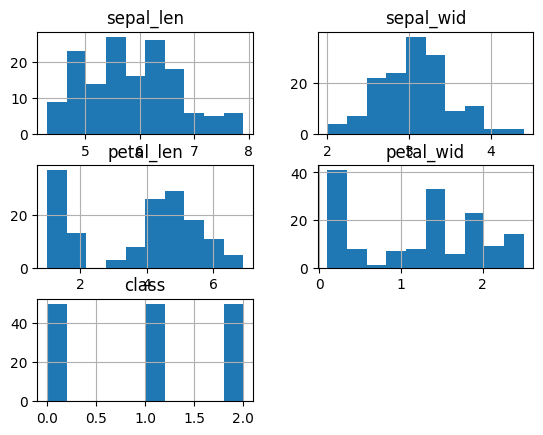

In [78]:

rawdata= pd.read_excel("/content/drive/MyDrive/Colab Notebooks/DataMining/lab07/Iris.xlsx");

print ("data summary")
print (rawdata.describe())
nrow, ncol = rawdata.shape
print (nrow, ncol)
print ("\n correlation Matrix")
print (rawdata.corr())
rawdata.hist()
plt.show()

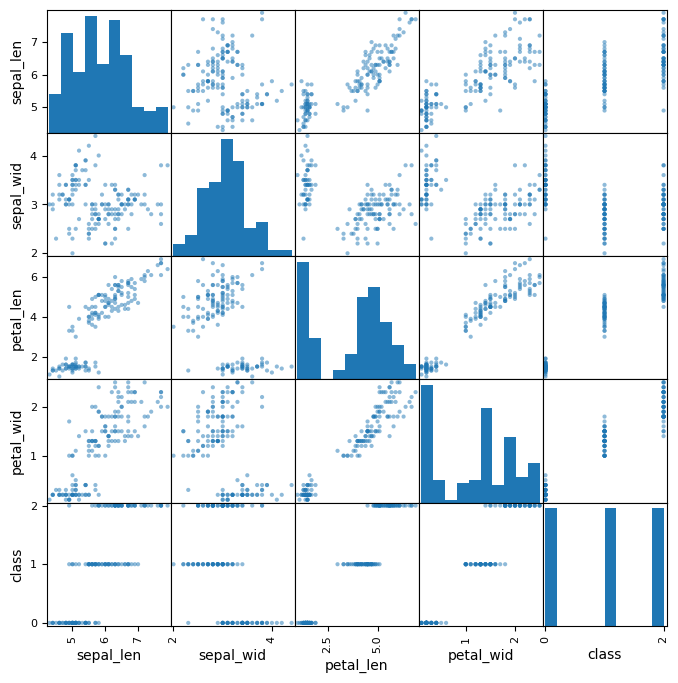

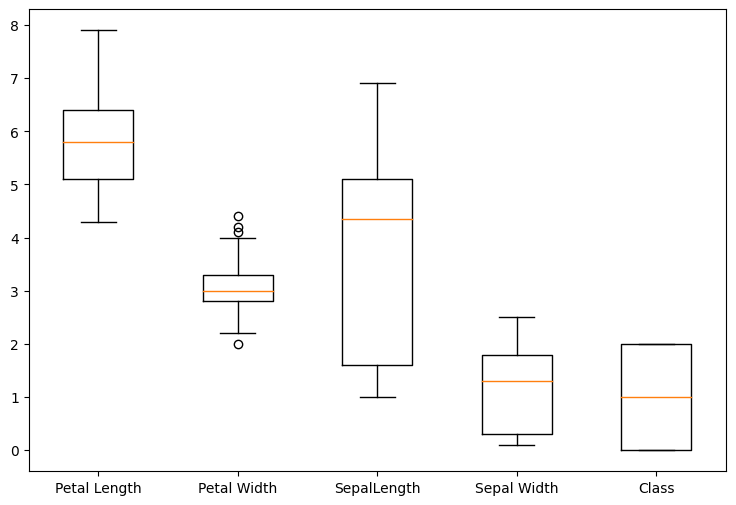

In [79]:
#3. Display correlations between all pairs of features
pd.plotting.scatter_matrix(rawdata,figsize=[8,8])
plt.show()
# boxplot
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.boxplot(rawdata.values)
ax.set_xticklabels(['Petal Length', 'Petal Width', 'SepalLength', 'Sepal Width', 'Class'])
plt.show()

In [80]:
#4. Get the predictors – all columns from 0 to last but one
predictors = rawdata.iloc[:,:ncol-1]
print(predictors)
#index to last column to obtain class values
target = rawdata.iloc[:,-1]
print(target)

     sepal_len  sepal_wid  petal_len  petal_wid
0          5.1        3.5        1.4        0.2
1          4.9        3.0        1.4        0.2
2          4.7        3.2        1.3        0.2
3          4.6        3.1        1.5        0.2
4          5.0        3.6        1.4        0.2
..         ...        ...        ...        ...
145        6.7        3.0        5.2        2.3
146        6.3        2.5        5.0        1.9
147        6.5        3.0        5.2        2.0
148        6.2        3.4        5.4        2.3
149        5.9        3.0        5.1        1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int64


In [81]:
#5. Partition data using a train/test split
#By referring to https://scikit-learn.org/0.16/modules/generated/sklearn.cross_validation.train_test_split.html
#complete the right-hand side of the line below and set the training set size to 70% of the size
#of the dataset.
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, test_size=0.3, stratify=target, random_state=0,shuffle=True)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,shuffle=True);

Accuracy score of our model with Decision Tree: 2 0.9777777777777777
Precision score of our model with Decision Tree  : 0.9777777777777777
Recall score of our model with Decision Tree : 0.9777777777777777
AUC values of the decision tree 1.0


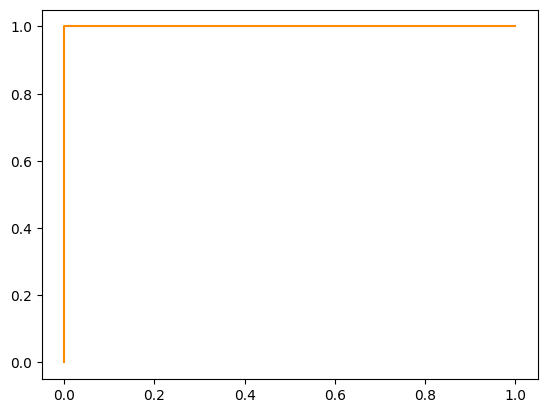

AUC values of the decision tree 0.9833333333333334


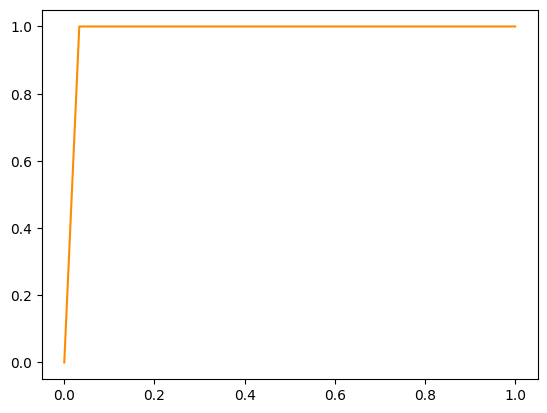

AUC values of the decision tree 0.9666666666666667


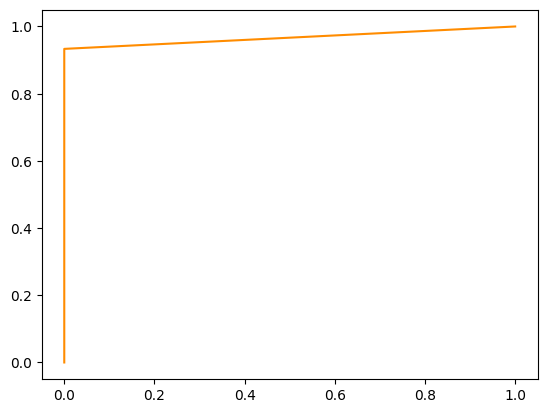

Accuracy score of our model with Decision Tree: 3 0.9777777777777777
Precision score of our model with Decision Tree  : 0.9777777777777777
Recall score of our model with Decision Tree : 0.9777777777777777
AUC values of the decision tree 1.0


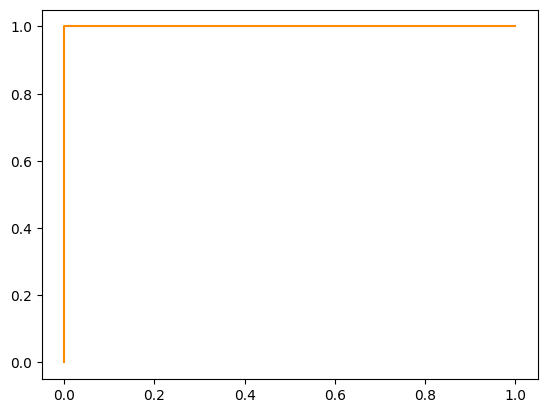

AUC values of the decision tree 0.9833333333333334


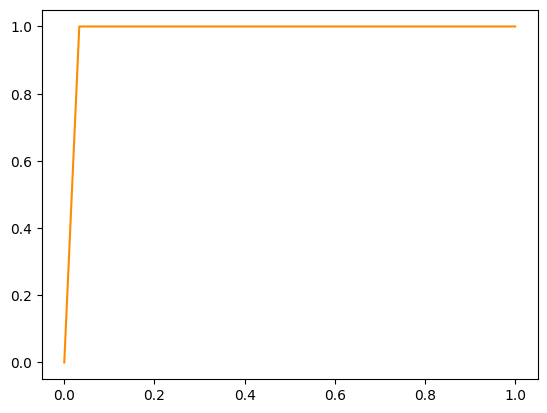

AUC values of the decision tree 0.9666666666666667


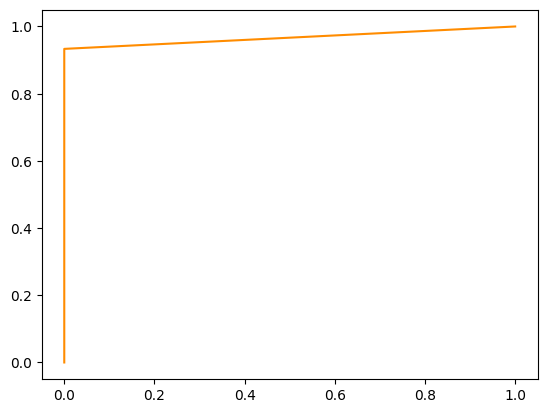

In [82]:
#6. Configure the Decision Tree Classifier
split_threshold=4
fpr = dict() # store false positive rate in a dictionary object
tpr = dict() # likewise, store the true positive rate
roc_auc = dict()



for i in range(2, split_threshold):
  print("===================================================================")
  classifier = DecisionTreeClassifier(min_samples_split=i) #configure the classifier
  classifier = classifier.fit(pred_train, tar_train) #  train a decision tree model
  predictions = classifier.predict(pred_test) # deploy  model and make predictions on test set
  prob = classifier.predict_proba(pred_test) # obtain  probability scores for each sample in test set
  print("Accuracy score of our model with Decision Tree:",i, accuracy_score(tar_test, predictions))
  precision = precision_score(y_true=tar_test,  y_pred=predictions, average='micro')
  print("Precision score of our model with Decision Tree  :", precision)
  recall = recall_score(y_true=tar_test, y_pred=predictions, average='micro')
  print("Recall score of our model with Decision Tree :",  recall)
  for x in range(3):
    fpr[x], tpr[x], _ = roc_curve(tar_test[:], prob[:,x],pos_label=x)
    roc_auc[x] = auc(fpr[x], tpr[x])
    print("AUC values of the decision tree",roc_auc[x])
    plt.plot(fpr[x], tpr[x],
    color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[x])
    plt.show()